# Proyecto Final Data Analysis

## Analisis comercial para América Móvil

## Objetivo: 

Realizar el análisis de la información comercial de América Móvil contenido para Claro Video con la finalidad de
    encontrar insights que nos ayuden a generar acciones y estrategias que ayuden al negocio.

## Información: 
 
 Se cuenta con un dataset que contiene información referente a los indicadores más importantes de dicha aplicacion
 para México y Lationamérica.

## Procedimiento

Lectura de los datos:

Lo primero que tenemos que hacer es importar las que ocuparemos: CSV, Numpy, Pandas y Matplotlib para leer nuestro archivo CSV y definirlo como nuestro dataframe.

In [1]:
#Importamos Numpy, pandas y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#Leemos el csv para convertirlo en nuestra variable que será nuestro dataframe
dfClaroVD = pd.read_csv('C:/Users/marti/Desktop/Python-Curso/Claro-Video.csv')
dfClaroVD.head()

c:\users\marti\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,31/08/2018,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,31/08/2018,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,31/08/2018,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO


 a) Conocimiento del dataframe

In [2]:
# Vemos que nuestro dataframe contiene 161,355 filas y 20 columnas

dfClaroVD.shape

(161355, 20)

In [3]:
# Vemos el número de registros por cada columna.
# Así podemos ver que no todas las columnas tienen el mismo número de registros y esto es debido a la forma de cubo que tiene
# nuestro dataframe.
dfClaroVD.count()

NOMBRE_METRICA                  161355
FECHA_INFO                      161355
PAIS                            161355
ABONO                           123899
SEMANA                          161166
MEDIO_PAGO_NOMBRE               143688
CANTIDAD                        161206
N_USUARIOS                      157047
canal                           149233
fecha_min                        17900
fecha_max                        17900
TX_DISP_CATEGORIA_ORIGINAL      128309
modelo                          133196
medio_pago_homologado           161355
tipo_reporte                    161355
TX_DISP_CATEGORIA_HOMOLOGADA    133196
País Homologado                 161355
FECHA                           161355
AÑO                             161355
MES                             161355
dtype: int64

In [4]:
# Asi mismo identificamos el tipo de datos de cada columna para tenerlo en cuenta antes de realizar algún cálculo
dfClaroVD.dtypes

NOMBRE_METRICA                   object
FECHA_INFO                        int64
PAIS                             object
ABONO                            object
SEMANA                          float64
MEDIO_PAGO_NOMBRE                object
CANTIDAD                         object
N_USUARIOS                      float64
canal                            object
fecha_min                       float64
fecha_max                       float64
TX_DISP_CATEGORIA_ORIGINAL       object
modelo                           object
medio_pago_homologado            object
tipo_reporte                     object
TX_DISP_CATEGORIA_HOMOLOGADA     object
País Homologado                  object
FECHA                            object
AÑO                               int64
MES                              object
dtype: object

In [59]:
# Analizamos la columna "NOMBRE_METRICA" que contiene las medidas mientras que las demás columnas
# nos indican las distintas dimensiones
pd.value_counts(dfClaroVD['NOMBRE_METRICA'])

Visualizaciones      133196
Bajas                 12328
Altas                  5572
Suscripciones          5012
Activos 30 días        1193
Rentas                  850
Stand Alone             577
Bundle                  577
Empaquetados            556
Universo                556
Periodo de Prueba       528
Usuarios Anónimos       320
Compras                  90
Name: NOMBRE_METRICA, dtype: int64

b) Procesamiento de la información

In [12]:
# Comenzaremos por analizar la metrica de visualizaciones ya que es una de las más importantes
# Aislamos este indicador mediante una matriz boleana

visCV = dfClaroVD['NOMBRE_METRICA'] == 'Visualizaciones'
visCV.head()

0    True
1    True
2    True
3    True
4    True
Name: NOMBRE_METRICA, dtype: bool

In [13]:
# Después generamos un nuevo dataset que sólo contiene visualizaciones

Visualizaciones = dfClaroVD[visCV]
Visualizaciones.head()

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,31/08/2018,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,31/08/2018,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,31/08/2018,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO


In [14]:
# Ahora el tamaño de la nueva variable cambia y comprobamos que sólo trae el KPI de Visualizaciones 

Visualizaciones.shape

(133196, 20)

In [15]:
# Identificamos que la columna que nos ayudará a calcular las diferentes metricas es 'CANTIDAD', sin embargo, es de clase objeto
# Por lo que tendremos que convertirla a entero; al mismo tiempo traemos 'PAIS', 'AÑO' Y 'MES' para otros análisis.

Canok = Visualizaciones['CANTIDAD'].astype('int64')
Paisok = Visualizaciones['PAIS']
#Añook = Visualizaciones['AÑO'].astype('str')
#Mesok = Visualizaciones['MES']

In [16]:
# La conversión anterior nos dio como resultado listas por lo que las convertirenos País y Cantidad a un arreglo de numpy para
# determinar el número de visualizaciones por país.
NuevoDF = np.array([[Paisok], [Canok]])
NuevoDF = NuevoDF.T
NuevoDF

array([[['ELSALVADOR', 37]],

       [['ELSALVADOR', 6]],

       [['ELSALVADOR', 41]],

       ...,

       [['URUGUAY', 6]],

       [['URUGUAY', 408]],

       [['URUGUAY', 210]]], dtype=object)

In [17]:
#Las convertimos a un nuevo dataframe

Cantidades = pd.DataFrame(NuevoDF[:, 0])
Cantidades.columns = ['Pais', 'Visualizaciones (mill)']
Cantidad = Cantidades['Visualizaciones (mill)'].astype('int64')
Cantidades = pd.DataFrame(Cantidades)
Cantidades

,Pais,Visualizaciones (mill)
0,ELSALVADOR,37
1,ELSALVADOR,6
2,ELSALVADOR,41
3,ELSALVADOR,2
4,ELSALVADOR,4
...,...,...
133191,URUGUAY,17
133192,URUGUAY,5
133193,URUGUAY,6
133194,URUGUAY,408


c) Visualización de los datos

In [18]:
# Agrupamos la información por país obteniendo el número total de visualizaciones para cada uno y su participación correspondiente.

Tabla1= Cantidades.groupby(['Pais']).sum() / 1000000
TablaSort = Tabla1['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF = pd.DataFrame(TablaSort)
Share = (SortDF['Visualizaciones (mill)'] / SortDF['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF['Share %'] = Share
SortDF.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,Visualizaciones (mill),Share %
Pais,,
MEXICO,1031,86
COLOMBIA,62,5
ARGENTINA,31,3
PERU,26,2
BRASIL,17,1
CHILE,13,1
ECUADOR,6,1
ELSALVADOR,4,0
GUATEMALA,2,0


d) Interpretación

En dicha tabla podemos ver las visualizaciones totales divididas en millones para una mejor presentación de los datos así como su porcentaje. Vemos que México tiene el 86%, seguido de Colombia 5%, Argentina 3%

In [62]:
Canok = Visualizaciones['CANTIDAD'].astype('int64')
Disp = Visualizaciones['TX_DISP_CATEGORIA_ORIGINAL'].astype('str')
DispNP = np.array([[Disp], [Canok]])
DispNP = DispNP.T
DispDF = pd.DataFrame(DispNP[:, 0])
DispDF.columns = ['Dispositivo', 'Visualizaciones (mill)']
#DispDF = pd.DataFrame(DispDF)
Tabla2= DispDF.groupby(['Dispositivo']).sum() / 1000000
TablaSort2 = Tabla2['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF2 = pd.DataFrame(TablaSort2)
Share2 = (SortDF2['Visualizaciones (mill)'] / SortDF2['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF2['Share %'] = Share2
SortDF2 = SortDF2.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
SortDF2

,Visualizaciones (mill),Share %
Dispositivo,,
tv,377,31
stb,349,29
mobile,253,21
web,92,8
tablet,60,5
nan,43,4
console,24,2


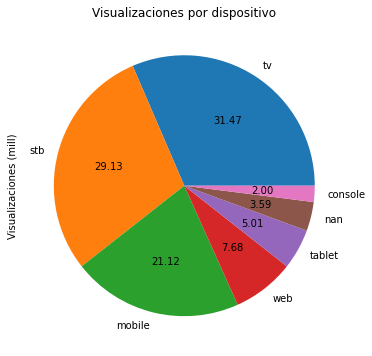

In [127]:
plot = TablaSort2.plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Visualizaciones por dispositivo')

In [55]:
Modelo = Visualizaciones['modelo'].astype('str')
ModNP = np.array([[Modelo], [Canok]])
ModNP = ModNP.T
ModDF = pd.DataFrame(ModNP[:, 0])
ModDF.columns = ['Modelo', 'Visualizaciones (mill)']
Tabla3= ModDF.groupby(['Modelo']).sum() / 1000000
TablaSort3 = Tabla3['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF3 = pd.DataFrame(TablaSort3)
Share3 = (SortDF3['Visualizaciones (mill)'] / SortDF3['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF3['Share %'] = Share3
SortDF3.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Visualizaciones (mill),Share %
Modelo,,
coship,269,22
android,244,20
samsung,155,13
lg,124,10
No Especificado,113,9
Otros,92,8
Apple,57,5
hisense,43,4
Otros,32,3


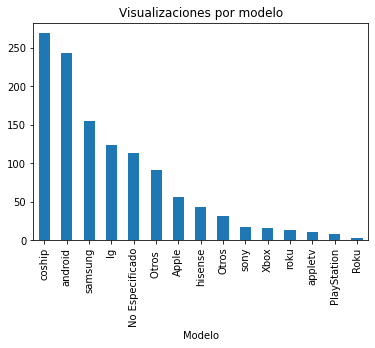

In [106]:
plot3 = TablaSort3.plot(kind='bar', title='Visualizaciones por modelo')

In [131]:
Vis18 = Visualizaciones['AÑO'] == 2018
Visualizaciones18 = Visualizaciones[Vis18]
Vis19 = Visualizaciones['AÑO'] == 2019
Visualizaciones19 = Visualizaciones[Vis18]
Vis20 = Visualizaciones['AÑO'] == 2020
Visualizaciones20 = Visualizaciones[Vis20]

In [132]:
Susc = dfClaroVD['NOMBRE_METRICA'] == 'Suscripciones'
Suscripciones = dfClaroVD[Susc]
Susc18 = Suscripciones['AÑO'] == 2018
Suscripciones18 = Suscripciones[Susc18]
Susc19 = Suscripciones['AÑO'] == 2019
Suscripciones19 = Suscripciones[Susc19]
Suscripciones19

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
34411,Suscripciones,20190131,DOMINICANA,Claro video - Premium - 30 días,20190131.0,Móvil,28196,28196.0,NaN,NaN,NaN,NaN,NaN,Móvil,M,NaN,R. Dominicana,31/01/2019,2019,ENERO
34412,Suscripciones,20190131,MEXICO,Claro video - Premium - 30 días,20190131.0,Recibo Telmex,5.62259e+06,5622587.0,NaN,NaN,NaN,NaN,NaN,Fija,M,NaN,México,31/01/2019,2019,ENERO
34413,Suscripciones,20190131,COLOMBIA,Claro video - Premium - 30 días,20190131.0,Fija,516477,516477.0,NaN,NaN,NaN,NaN,NaN,Fija,M,NaN,Colombia,31/01/2019,2019,ENERO
34414,Suscripciones,20190131,URUGUAY,Claro video - Premium - 30 días,20190131.0,Móvil,12254,12254.0,NaN,NaN,NaN,NaN,NaN,Móvil,M,NaN,Uruguay,31/01/2019,2019,ENERO
34415,Suscripciones,20190131,NICARAGUA,Claro video - Premium - 7 días,20190131.0,Móvil,1,1.0,NaN,NaN,NaN,NaN,NaN,Móvil,M,NaN,Nicaragua,31/01/2019,2019,ENERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129446,Suscripciones,20191231,ARGENTINA,CORDOBA_HD,20191231.0,Hub Corporativo Fijo,412,412.0,NaN,NaN,NaN,NaN,NaN,Fija,M,NaN,Argentina,31/12/2019,2019,DICIEMBRE
129447,Suscripciones,20191231,MEXICO,Picardia Nacional 7 días,20191231.0,Recibo Telmex,1533,1533.0,NaN,NaN,NaN,NaN,NaN,Fija,M,NaN,México,31/12/2019,2019,DICIEMBRE
129448,Suscripciones,20191231,PARAGUAY,Paramount + 30 días,20191231.0,Pincode,6,6.0,NaN,NaN,NaN,NaN,NaN,Móvil,M,NaN,Paraguay,31/12/2019,2019,DICIEMBRE
129449,Suscripciones,20191231,ARGENTINA,GRILLAFULL_HD,20191231.0,Hub Corporativo Fijo,414,414.0,NaN,NaN,NaN,NaN,NaN,Fija,M,NaN,Argentina,31/12/2019,2019,DICIEMBRE


In [2]:
#pd.crosstab(index=Visualizaciones['AÑO'], columns=Visualizaciones['MES'] , margins=True).apply(lambda r: r/len(Visualizaciones) *100, axis=1)

In [1]:
#pd.crosstab(index=Visualizaciones['AÑO'], columns=Visualizaciones['MES']).apply(lambda r: r/r.sum() *100, axis=0)

In [16]:
Resto_KPIS = dfClaroVD[dfClaroVD['NOMBRE_METRICA'] != 'Visualizaciones']
Resto_KPIS.head()

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
407,Bajas,20180831,COLOMBIA,HBO - Premium - 30 días,20180831.0,Móvil,20,20.0,CANCELACION DEL USUARIO,20180803.0,20180831.0,NaN,NaN,Móvil,M,NaN,Colombia,2018/08/31,2018,AGOSTO
408,Bajas,20180831,COLOMBIA,HBO - Premium - 30 días,20180831.0,Móvil,22,22.0,CANCELACION LOGICA,20180801.0,20180829.0,NaN,NaN,Móvil,M,NaN,Colombia,2018/08/31,2018,AGOSTO
409,Bajas,20180831,COSTARICA,Claro video - Premium - 30 días,20180831.0,Fija,8,8.0,CANCELACION DESDE ADMIN,20180803.0,20180830.0,NaN,NaN,Fija,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO
410,Bajas,20180831,COSTARICA,CRACKLE - Premium - 30 días,20180831.0,Móvil,7,7.0,CANCELACION DEL USUARIO,20180801.0,20180828.0,NaN,NaN,Móvil,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO
411,Bajas,20180831,COSTARICA,CRACKLE - Premium - 30 días,20180831.0,Móvil,3,3.0,CANCELACION LOGICA,20180808.0,20180823.0,NaN,NaN,Móvil,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO


In [20]:
Resto_KPIS.shape

(28159, 20)

In [ ]:
link https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/